## Dados Ausentes

É necessário lidar com dados ausentes, neste capítulo, exploraremos um pouco mais o assunto.

A maioria dos algoritmos não funcionará se houver dados ausentes. Exceções dignas de nota são as recentes bibliote-
cas inovadoras XGBoost, CatBoost e LightGBM.

Há diversas maneiras de lidar com dados ausentes:

-> Remover qualquer linha com dados ausentes;
-> Remover qualquer coluna com dados ausentes;
-> Imputar dados aos valores ausentes;
-> Criar uma coluna para informar que os dados estavam ausentes;

In [2]:
import pandas as pd

In [3]:
# Caminho em Pasta
path = "datasets/titanic/titanic3.xls"

In [13]:
#df = pd.read_excel(url)
df = pd.read_excel(path)
orig_df = df

##### Analisando dados ausentes

Pelo fato de Python tratar True e False como 1 e 0 respectivamente.Podemos usar esse truque no pandas para obter 
o percentual dos dados ausentes

In [7]:
df.isnull().mean() * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

##### Para visualizar padrões nos dados ausentes, utilize a biblioteca missíngno (https://oreil.ly/rgYJG)
a qual é conveniente para visualizar áreas contíguas de dados ausentes, que sinalizariam que os dados ausentes não são aleatórios.


In [8]:
# Instalar a Biblioteca Missingno
#!pip install missingno

##### A função matrix inclui uma área em detaque do lado direito. 

Padrões nesse local também indicariam que os dados ausentes não são aleatórios. Talvez seja necessário limitar o 
número de amostras para que seja possível ver os padrões:

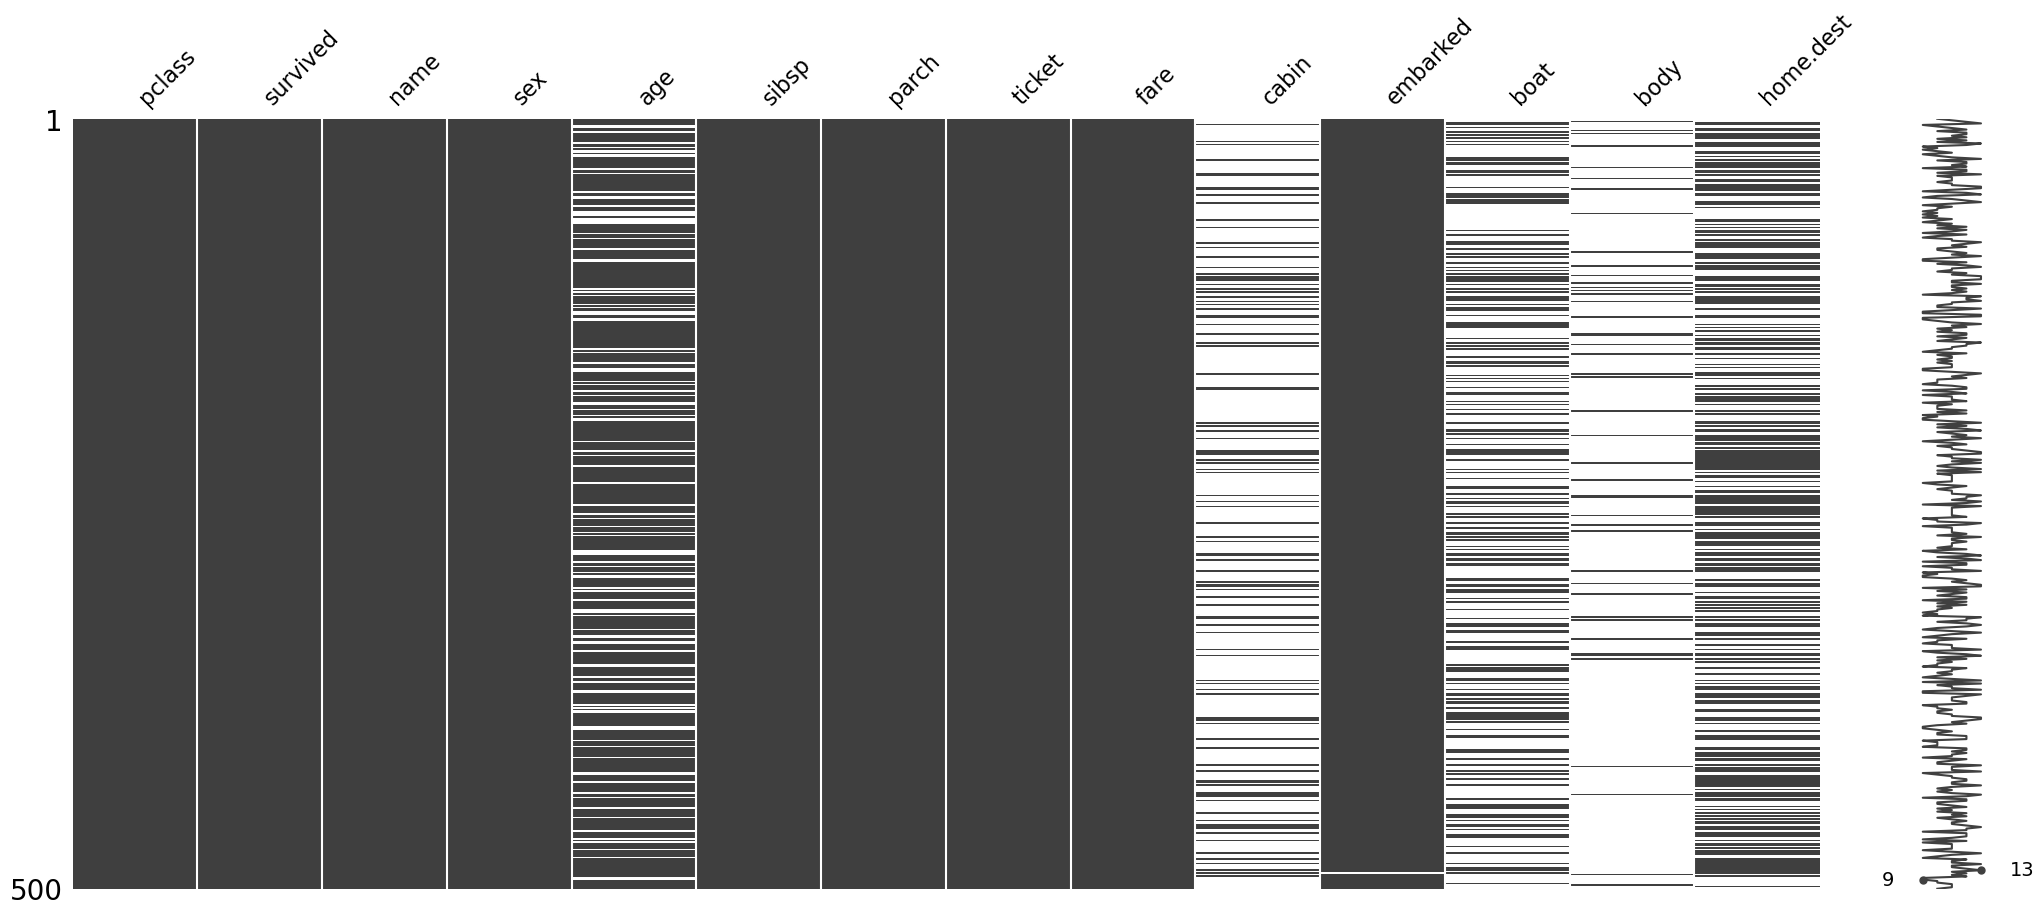

In [14]:
import missingno as msno
ax = msno.matrix(orig_df.sample(500))
ax.get_figure().savefig("images/mlpr_0401.png")

##### Podemos criar um gráfico de barras com os contadores de dados ausentes usando o pandas

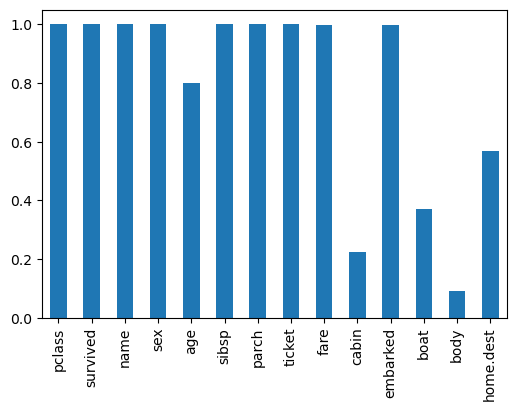

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)
fig.savefig("images/mlpr_0402.png", dpi=300)

In [ ]:
Percentual de dados não ausentes com o pandas. Os dados de boat(barco salva-vidas) e body(identificação do corpo)

Causam vazamento de informações, portanto devemos ignorá-los. É interessante o fato de haver idades ausentes.

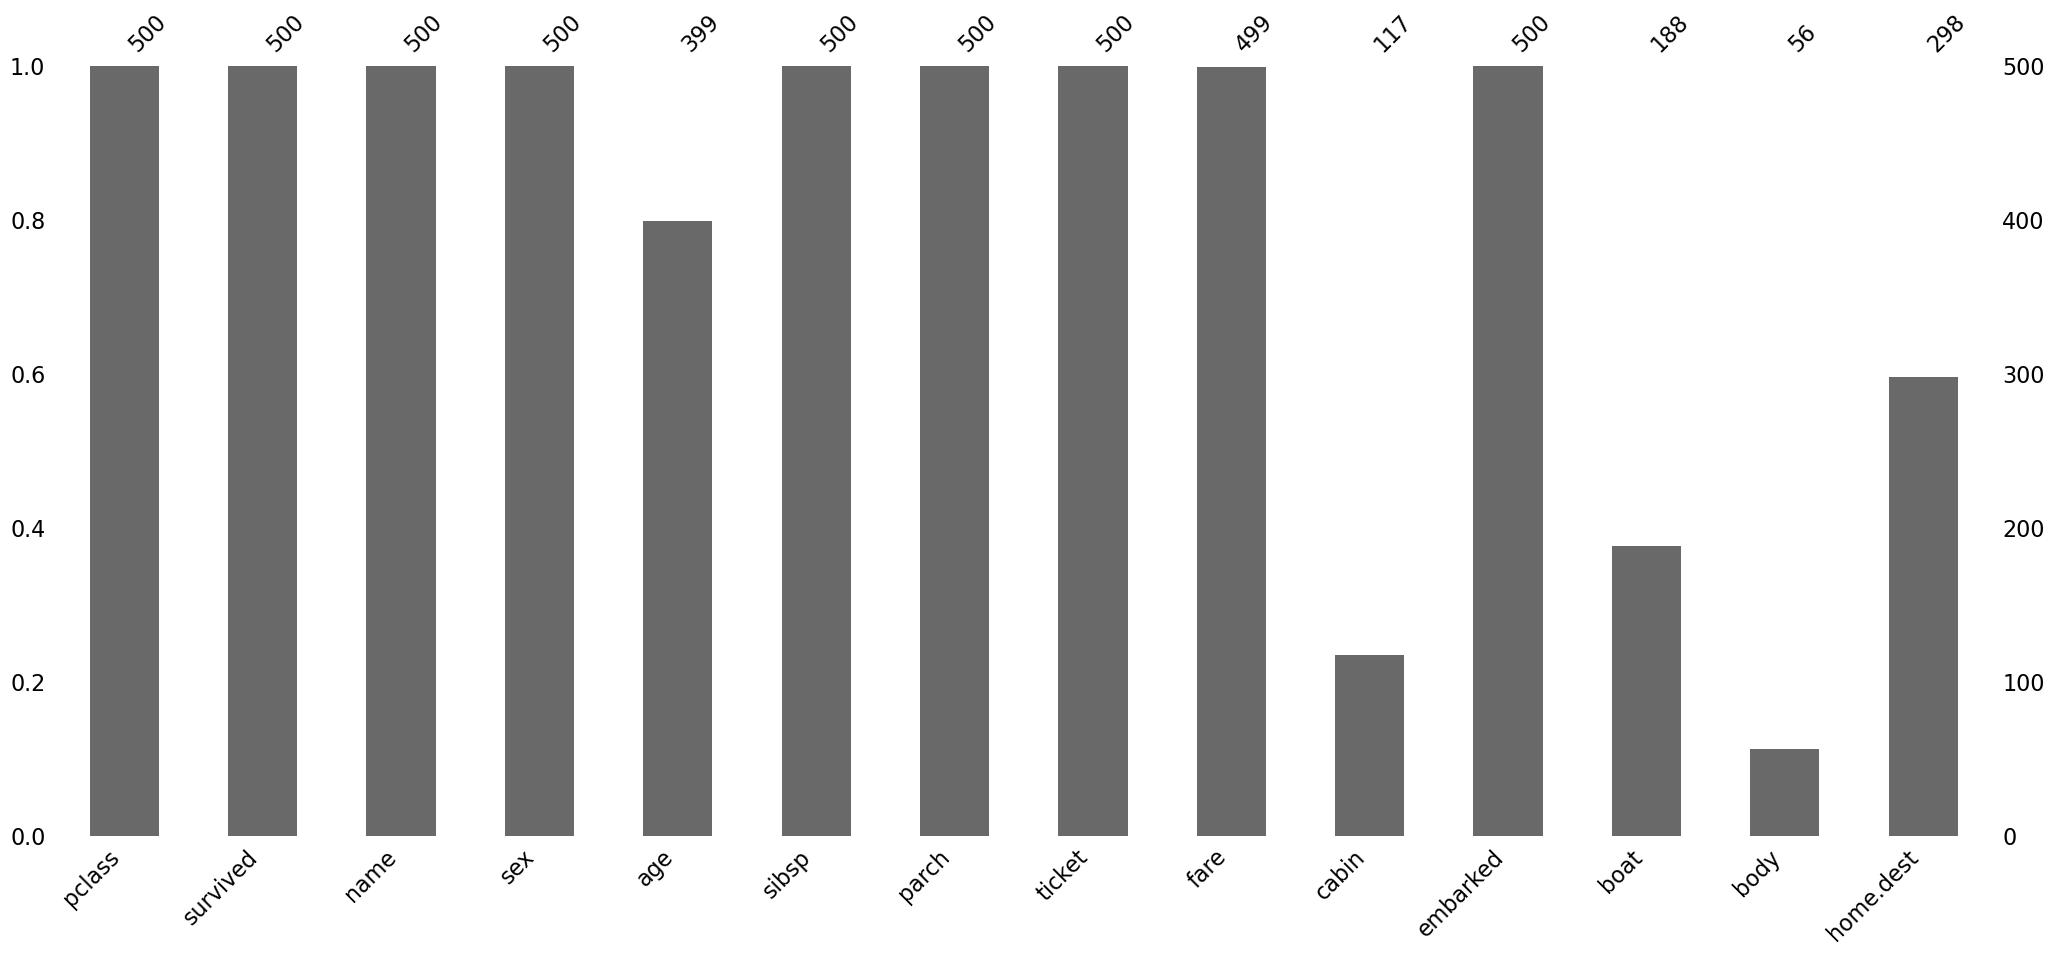

In [16]:
# Podemos também usar a biblioteca missingno para gerar o mesmo gráfico:
ax = msno.bar(orig_df.sample(500))
ax.get_figure().savefig("images/mlpr_0403.png")

##### Um heat map(mapa de calor) pode ser criado, mostrando se há correlações no caso de haver dados ausentes

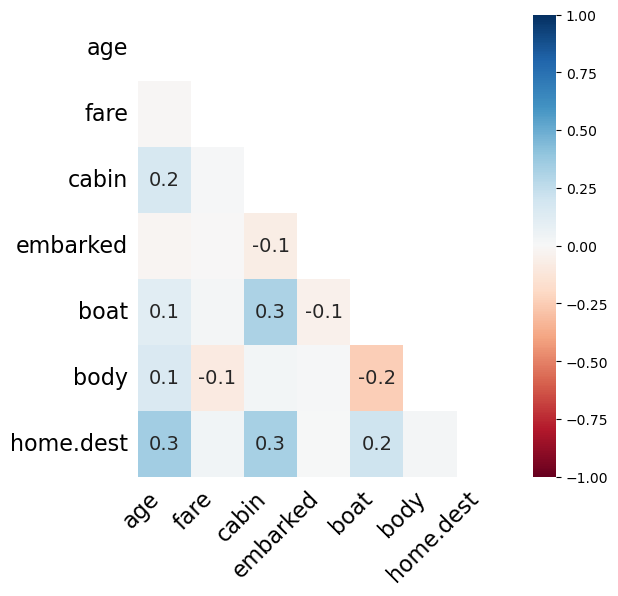

In [17]:
# Em nosso caso, não parece haver correlações entre os atributos que apresentam dados ausentes:
ax = msno.heatmap(df, figsize=(6, 6))
ax.get_figure().savefig("images/mlpr_0404.png")

##### Podemos criar um dendrograma que mostra os clusterings(agrupamentos) de dados ausentes. 

As folhas que estão no mesmo nível fazem a predição da presença uma das outras (cheias ou preenchidas).
Os braços verticais são usadaos para mostrar a diferença entre os clusters. Braços curtos indicam que os ramos são
semelhantes.

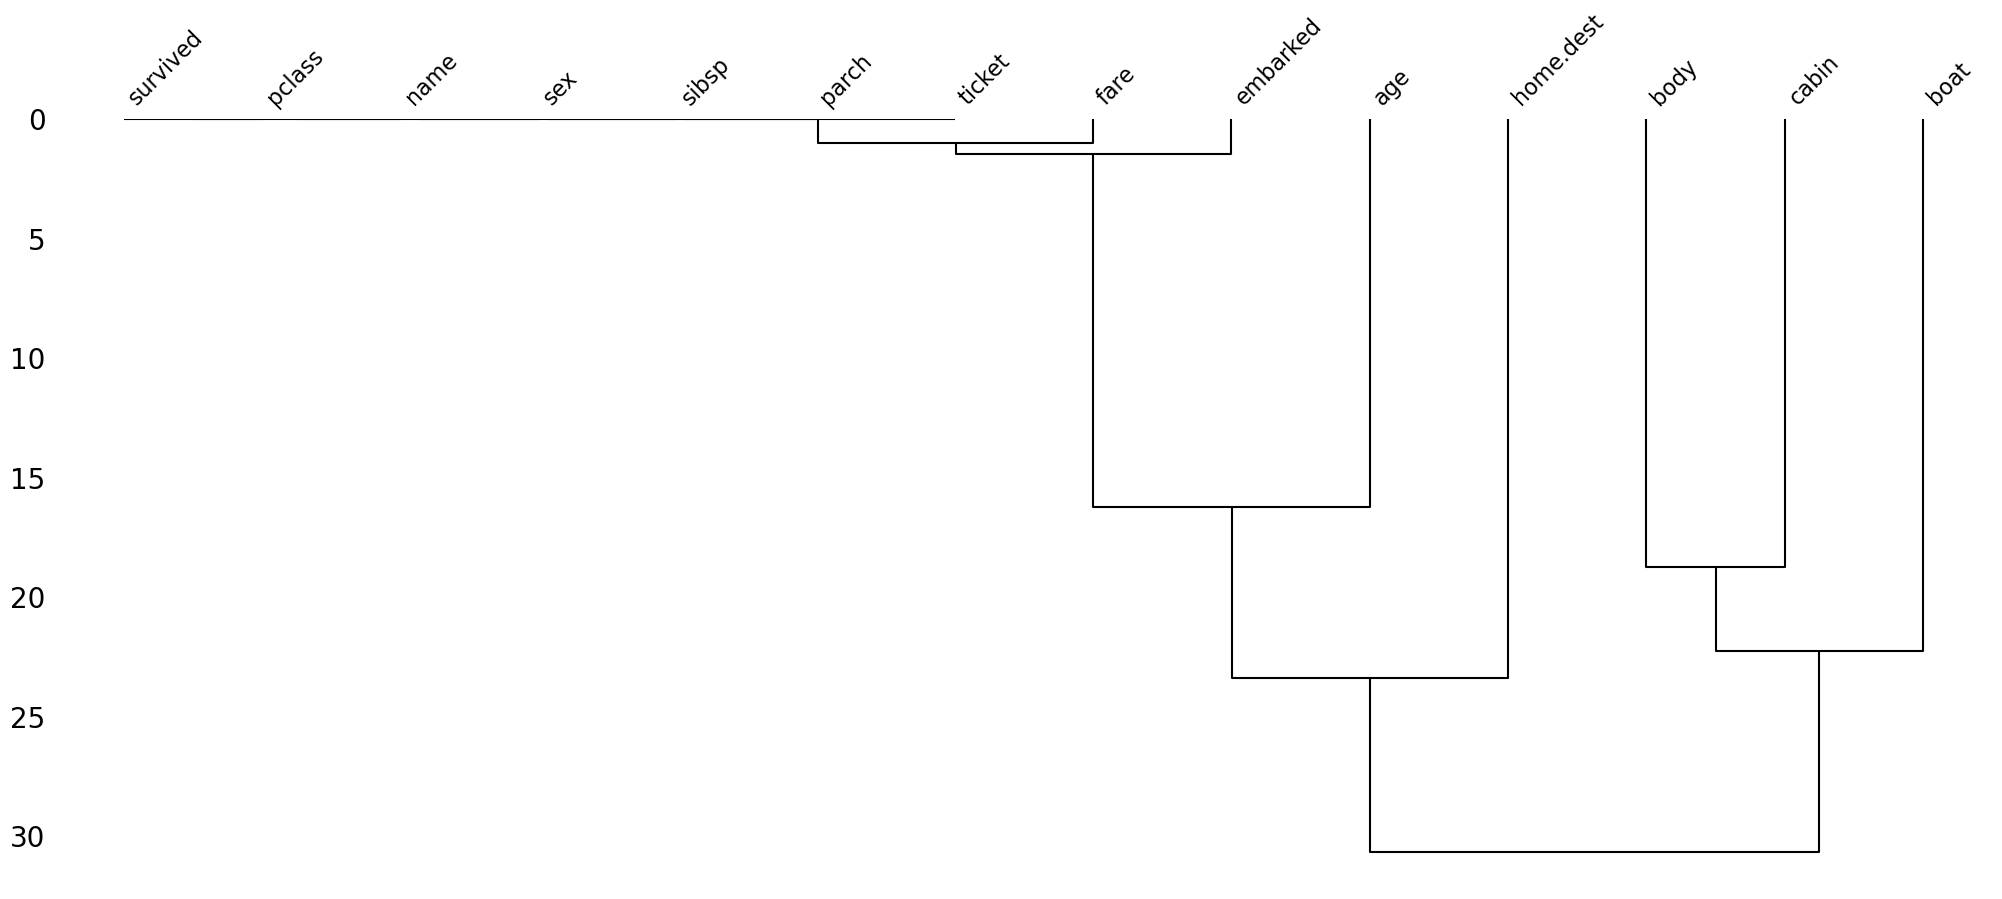

In [20]:
ax = msno.dendrogram(df)
ax.get_figure().savefig("images/mlpr_0405.png")

##### Dendrograma de dados ausentes gerado com o missingno

Podemos ver as colunas que não têm dados ausentes na parte superior à esquerda

##### Descartando dados ausentes

A biblioteca pandas é capaz de descartar todas as linhas contendo dados ausentes usando o método .dropna

In [21]:
df1 = df.dropna()

##### Para descartar as colunas, podemos observar quais colunas contêm dados ausentes e utilizar .drop

In [22]:
# É possível passar uma lista de nomes de colunas ou um único nome de coluna:
df1 = df.drop(columns="cabin")

In [23]:
# Como alternativa, podemos usar o método .dropna e definir axis=1 (descartar no eixo das colunas)
df1 = df.dropna(axis=1)

##### Imputando dados 

Depois que tivermos uma ferramenta para predição de dados, podemos usá-la para prever valores no caso de dados 
ausentes. A tarefa geral para definir valores a dados ausentes chama-se "imputação - imputation".

Se estiver imputando dados, será necessário construir um pipeline e usar a mesma lógica de imputação na criação do 
modelo e no momento da predição. A classe "SimpleImputer" do Scikit-Learn trabalhará com a média, a mediana e com
os valores mais frequentes dos atributos.

In [24]:
# O comportamento default é calcular a média:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(
    include="number"
).columns
im = SimpleImputer() # Média
imputed = im.fit_transform(df[num_cols])

##### Acrescentando colunas informativas

A ausência de dados por si só pode fornecer alguns sinais a um modelo. A biblioteca pandas é capaz de acrescentar 
uma nova coluna para informar que um valor estava ausente:

In [25]:
def add_indicator(col):
    def wrapper(df):
        return df[col].isna().astype(int)
    
    return wrapper

In [26]:
df1 = df.assign(cabin_missing=add_indicator("cabin"))

In [27]:
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_missing
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
